# Ch1. 위험 관리의 기초
- ML 모델: 합성 데이터 생성 통해 데이터의 비가용성 극복하는 해법
- 위험 in 재무적 관점: 회사가 노출될 수 있는 잠재적 손실 or 불확실성의 수준

In [ ]:
# 위험 - 수익 사이 관계
import statsmodels.api as sm
import numpy as np
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import plotly
import warnings
warnings.filterwarnings('ignore')

: 

In [6]:
n_assets=5
n_simulation=500
returns=np.random.randn(n_assets,n_simulation)
rand=np.random.rand(n_assets)
weights=rand/sum(rand)

In [ ]:
def port_return(returns):
    rets=np.mean(returns,axis=1) # 가로로 평균 계산 -> 가로 행렬 반환
    cov=np.cov(rets.T,aweights=weights,ddof=1)
    portfolio_returns=np.dot(weights,rets.T)
    portfolio_std_dev=np.sqrt(np.dot(weights,np.dot(cov,weights)))
    return portfolio_returns, portfolio_std_dev

In [ ]:
portfolio_returns, portfolio_std_dev=port_return(returns)

In [11]:
portfolio=np.array([port_return(np.random.randn(n_assets,i))for i in range(1,101)])
best_fit=sm.OLS(portfolio[:,1],sm.add_constant(portfolio[:,0])).fit().fittedvalues

[ 1.30287997  0.3061365   0.27010175  1.54894333 -0.42797948]
[ 0.52000054 -0.82892156  1.03328082  0.56322995 -0.21368207]
[ 0.11372666 -0.49962088 -0.72412643 -0.28476129 -0.37682655]
[ 0.21438233 -0.23078248  0.10889473 -0.93954646  0.147722  ]
[-0.85791381 -0.18727042  0.36414739 -0.18909554  1.05500468]
[ 0.13850471 -0.26118808 -0.59167845  0.66634311  0.4102812 ]
[-0.1700069   0.05538175  0.05765345  0.57858003 -0.03865294]
[-0.21744174 -0.43152154  0.21360883 -0.2111774   0.20416417]
[ 0.62279006 -0.68275532 -0.30265775 -0.19930926  0.44825454]
[ 0.2108123   0.40023935 -0.15428001  0.26445747 -0.39413441]
[-0.00270259  0.46373415 -0.42623559  0.54310549  0.34108913]
[ 0.08011603  0.21387906  0.40536838 -0.19247475  0.29376458]
[ 0.12245506  0.58607592  0.15539797  0.36443515 -0.62080181]
[ 0.02662756  0.03006991 -0.0486478  -0.30736845  0.06474961]
[-0.12617612 -0.01217728 -0.05429187 -0.06754987 -0.12242165]
[-0.30778411  0.61183911 -0.27886034 -0.05205737  0.17355634]
[-0.1583

In [12]:
fig=go.Figure()
fig.add_trace(go.Scatter(name='Risk-Return Relationship',
                         x=portfolio[:,0],
                         y=portfolio[:,1],mode='markers'))
fig.add_trace(go.Scatter(name='Best Fit Line',
                         x=portfolio[:,0],
                         y=best_fit, mode='lines'))
fig.update_layout(xaxis_title='Return',
                  yaxis_title='Standard Deviation',
                  width=900, height=470)
fig.show()

=> 위험과 수익이 함께 감

[주 재무위험]
1. 시장위험: 금융 시장의 요인 변화로 인해 발생하는 위험(금리, 환율)
2. 신용위험
3. 유동성 위험: 유동성=투자자가 거래를 실행하는 속도와 용이성
4. 운영 위험

In [ ]:
# 역선택 모델링 in 보험 산업
# 효용함수: U(c)=e^(yx)
#ex. 소비자 효용을 기반으로 보험 가입 여부를 결정함 -> 수입: 2$, 사고 비용: 1.5$
import matplotlib.pyplot as plt
import numpy as np
# plt.style.use('seaborn')

def utility(x):
    return(np.exp(x**gamma))

def supply(Q): # 기대 손실
    return(np.mean(pi[-Q:])*c)

def demand(D): # D: 보험료
    return(np.sum(utility(y-D)>pi*utility(y-c)+(1-pi)*utility(y))) # 구매 결정한 사람 수 반환

In [17]:
pi=np.random.uniform(0,1,20) # 균등 분포 손실 확률
pi=np.sort(pi)

In [19]:
y=2
c=1.5 # 사고 비용
Q=5
D=0.01 # 보험료
gamma=0.4

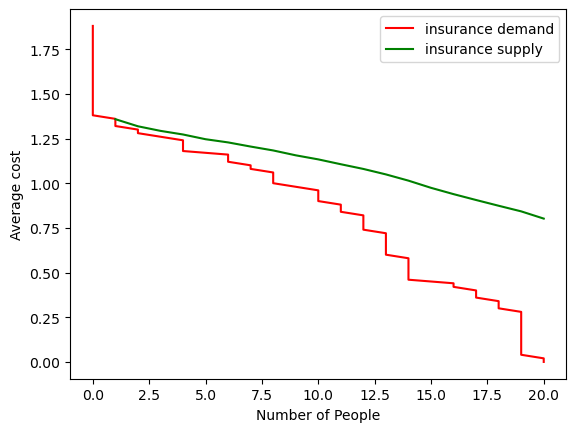

In [20]:
plt.figure()
plt.plot([demand(i) for i in np.arange(0,1.9,0.02)],
         np.arange(0,1.9,0.02),
         'r', label='insurance demand')
plt.plot(range(1,21), [supply(j) for j in range(1,21)],
         'g', label='insurance supply')
plt.ylabel('Average cost')
plt.xlabel('Number of People')
plt.legend()
plt.show()

=> 더 많은 사람들이 계약을 요구하고 더 많은 사람들이 계약할수록 위험이 낮아져 계약 가격에 영향을 미침